*Passo 1*

Importação das bibliotecas necessarias para criação de graficos, leitura dos arquivos, etc.

In [ ]:
%pip install seaborn pandas matplotlib opencv-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

*Passo 2* 

criação de funções que capturam as informações contidas no arquivo .csv, ao final, uma nova função chamada "df_combinado" que concatena todos os arquivos .csv em uma unica função para a melhor visualização dos dados.





In [49]:
df = pd.read_csv('salesforce_click_data_1.csv')
df2 = pd.read_csv('salesforce_click_data_2.csv')
df3 = pd.read_csv('salesforce_click_data_3.csv')
df_combinado = pd.concat([df, df2, df3])

df_combinado.head(5)

,Timestamp,X Position,Y Position
0,2024-03-24T20:39:28.674Z,679,213
1,2024-03-24T20:39:30.290Z,204,246
2,2024-03-24T20:39:31.993Z,596,95
3,2024-03-24T20:39:32.562Z,492,92
4,2024-03-24T20:39:33.161Z,387,94


*Passo 3*

Grafico de dispersão utilizando a biblioteca Seaborn, representação simples para ver se o "df_combinado" está funcionando corretamente. Note que: o grafico representa os clicks como se a página fosse carregada de baixo para cima, logo, é correto dizer que é um "grafico invertido"

<Axes: xlabel='X Position', ylabel='Y Position'>

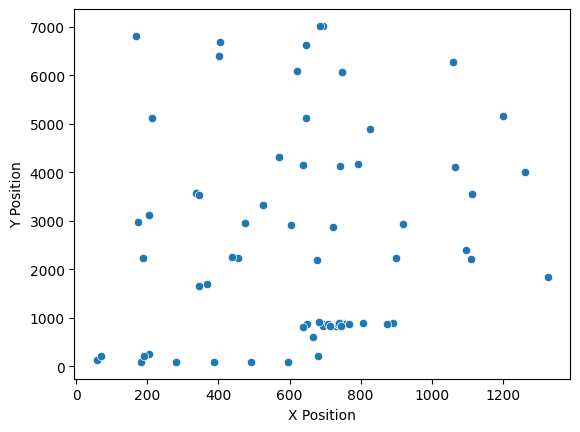

In [50]:
sns.scatterplot(
    df_combinado,
    x='X Position',
    y='Y Position',
)

*Passo 4*

Utilização da biblioteca OpenCV, para ler a imagem da pagina web, a imagem é mostrada utilizando matplotlib. Em seguida, filtramos os clicks para incluir somente clicks que efetivamente estão representados dentro da imagem. 

alem disso temos a criação de um grafico de dispersão utilizando Seaborn, onde as posições X e Y representam as cordenadas dos cliques dentro da imagem, representando os clicks que foram dados na pagina web.

por fim, a biblioteca matlotlib também é responsavel por salvar o grafico.

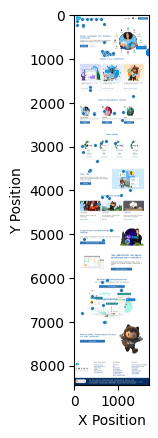

In [52]:
fundo = cv2.imread('salesforce_web.jpeg')
fundo = cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB)
plt.imshow(fundo)
df_filtrado = df[ df["Y Position"] < fundo.shape[0]] # filtrar os cliques que estão dentro da imagem
sns.scatterplot(
    df_combinado,
    x='X Position',
    y='Y Position',
    s=6,
)
plt.savefig('clicks.png', dpi=1200)

*Passo 5*

Semelhante ao passo 4, mas dessa vez o parametro kdeplot da biblioteca Seaborn para construir um grafico de calor (heatmap) da aplicação web.

C:\Users\nimar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(


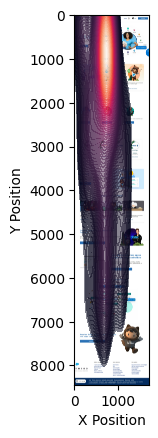

In [53]:
fundo = cv2.imread('salesforce_web.jpeg')
fundo = cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB) # para tirar o marrom e ficar com a cor normal rsrs
plt.imshow(fundo)
sns.kdeplot (
    df_combinado,
    x='X Position',
    y='Y Position',
    fill=True,
    cmap='rocket', alpha=0.5, levels=100, thresh=0.1, lw=0
)
plt.xlim(0, fundo.shape[1])
plt.ylim(fundo.shape[0], 0)
plt.savefig('heatmap3.png', dpi=1200)



**Feito por:**

Ander Kamada
RM: 553449

Nicolas Martins
RM: 553478

Yago Lucas Gonçalves da Silva
RM: 553013